In [1]:
import pandas as pd
import numpy as np
import pylab as p
import vaex as vaex
import vaex.ml
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import h5py

In [ ]:
from vaex.ml.sklearn import Predictor, IncrementalPredictor
# Regressions
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDClassifier, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [ ]:
for i, df in enumerate(vaex.from_csv('movie_rating_portal.csv', chunk_size=200_000)):
    print(i)
    df.export_hdf5(f'movie_rating_portal_{i}.hdf5')

In [2]:
df = vaex.open('movie_rating_portal_0.hdf5')
for i in range(1,6):
    i = str(i)
    v_file= 'movie_rating_portal_'+i+'.hdf5'
    print(v_file)
    df = df.concat(vaex.open(v_file))

movie_rating_portal_1.hdf5
movie_rating_portal_2.hdf5
movie_rating_portal_3.hdf5
movie_rating_portal_4.hdf5
movie_rating_portal_5.hdf5


In [3]:
id_df_max = len(df)
numero_inicial = 0
df_lista = []
for i in range(0, int(id_df_max/200000)):
    numero_inicial
    numero_final = numero_inicial+200000
    df_lista.append(df[numero_inicial:numero_final,:])
    numero_inicial = numero_inicial+200000

In [5]:
len(df_lista)

5

In [6]:
df_lista[0].export_csv('movie_rate_0.csv',sep='|')

In [7]:
df_lista[1].export_csv('movie_rate_1.csv',sep='|')

In [4]:
df_lista[2].export_csv('movie_rate_2.csv',sep='|')

In [5]:
df_lista[3].export_csv('movie_rate_3.csv',sep='|')

In [4]:
df_lista[4].export_csv('movie_rate_4.csv',sep='|')

In [3]:
big = df.concat(df.concat(df.concat(df)))

In [2]:
big.shape

NameError: name 'big' is not defined

In [6]:
big.Title.value_counts(progress=True)

[################################--------] 100.00% elapsed time  :     0.76s =  0.0m =  0.0h
 

Mad Max: Fury Road                               25872
12 Years a Slave                                 18072
The Grand Budapest Hotel                         16212
The Lord of the Rings: The Return of the King    16044
Blade Runner 2049                                14280
                                                 ...  
So Red the Rose                                      4
The Severed Arm                                      4
The Sex Adventures of the Three Musketeers           4
The Sex Therapist                                    4
Sözün Bittigi Yer                                    4
Length: 57028, dtype: int64

In [7]:
big[big.Budget.notnan()]

#,Unnamed: 0,ID_x,Budget,StudioInterference,PrePremiereScreenings,HeavyMarketing,RuntimeMinutes,Title,IDImdb,ReleaseDate,Description,Keywords,Certification,Lanuguages,Filming locations,Technical specs,IDTmdb,IDDataLens,IDCollection,IDGenre,IDMovie_x,id,Name_x,ID_y,IDAwardType,Category,IDMovie_y,IDMovie,IDMoviePortal,Rate,Votes,ID,Name_y,Homepage
0,8,69604,1700000.0,nan,nan,nan,113,Hawmps!,tt0074614,1976-05-20,"'{In 1854, at Fort Val Verde, Texas, the U.S. Ca...",None,None,nan,nan,nan,23380,nan,nan,15,69604,15,Western,nan,nan,None,nan,69604,1,5.2,272,1,Imdb,imdb
1,9,103813,30000000.0,nan,nan,nan,98,Wild Bill,tt0114938,1995-12-01,'{The early career of legendary lawman Wild Bill...,None,R,nan,nan,nan,65796,210.0,nan,15,103813,15,Western,nan,nan,None,nan,103813,1,5.9,5631,1,Imdb,imdb
2,17,49959,1538000.0,nan,nan,nan,86,The Law and Jake Wade,tt0051848,1958-11-22,'{Marshal Jake Wade aids outlaw Clint Hollister ...,None,None,nan,nan,nan,44766,nan,nan,15,49959,15,Western,nan,nan,None,nan,49959,1,6.8,1787,1,Imdb,imdb
3,18,40287,1754000.0,nan,nan,nan,90,Ambush,tt0041117,1950-01-13,"'{In 1878, Ward Kinsman, a prospector and Indian...",None,None,nan,nan,nan,151310,nan,nan,15,40287,15,Western,nan,nan,None,nan,40287,1,6.5,429,1,Imdb,imdb
4,21,353904,2000000.0,nan,nan,nan,104,The Proposition,tt0421238,2005-10-06,'{A lawman apprehends a notorious outlaw and giv...,None,R,nan,nan,nan,16608,39381.0,nan,15,353904,15,Western,5483.0,73.0,discovery of the year,353904.0,353904,1,7.4,46204,1,Imdb,imdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2,888,547",1094175,356153,149000000.0,nan,nan,nan,85,Flushed Away,tt0424095,2006-12-01,'{The story of an uptown rat that gets flushed d...,None,PG,nan,nan,nan,11619,48982.0,nan,3,356153,3,Animation,356679.0,4865.0,best character animation in a feature production,356153.0,356153,5,7.6,28,5,RottenCritic,RottenCritic
"2,888,548",1094176,356153,149000000.0,nan,nan,nan,85,Flushed Away,tt0424095,2006-12-01,'{The story of an uptown rat that gets flushed d...,None,PG,nan,nan,nan,11619,48982.0,nan,3,356153,3,Animation,356701.0,4865.0,'best production design in an animated feature p...,356153.0,356153,5,7.6,28,5,RottenCritic,RottenCritic
"2,888,549",1094177,356153,149000000.0,nan,nan,nan,85,Flushed Away,tt0424095,2006-12-01,'{The story of an uptown rat that gets flushed d...,None,PG,nan,nan,nan,11619,48982.0,nan,3,356153,3,Animation,356707.0,4865.0,'best storyboarding in an animated feature produ...,356153.0,356153,5,7.6,28,5,RottenCritic,RottenCritic
"2,888,550",1094178,356153,149000000.0,nan,nan,nan,85,Flushed Away,tt0424095,2006-12-01,'{The story of an uptown rat that gets flushed d...,None,PG,nan,nan,nan,11619,48982.0,nan,3,356153,3,Animation,356712.0,4865.0,'best voice acting in an animated feature produc...,356153.0,356153,5,7.6,28,5,RottenCritic,RottenCritic


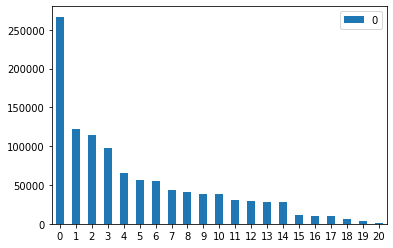

In [36]:
pd.DataFrame(df.Name_x.value_counts()).reset_index().plot.bar(rot=0)

In [37]:
pd.DataFrame(df.Name_x.value_counts()).reset_index()

,index,0
0,Drama,266740
1,Comedy,121607
2,Adventure,114462
3,Action,97116
4,Romance,65495
5,Crime,56025
6,Thriller,54629
7,Biography,44056
8,Fantasy,40419
9,Sci-Fi,37903


In [61]:
df = df[:,1:]
df = df[df.Budget.notnan()]

In [99]:
df.Title.unique().shape

(11637,)

In [100]:
horas_curso = 38+240+20+60+28+39+5+42

In [103]:
horas_curso = que_es_esto/60

In [106]:
23/4

5.75

In [ ]:
## REGRESION

In [ ]:
df0 = vaex.open('T201704.hdf5')
df1 = vaex.open('T201705.hdf5')
df = df0.concat(df1)

In [ ]:
df.columns

In [ ]:
features = ['practice','bnf_code','bnf_name','items','nic','act_cost']

In [ ]:
df.ml.train_test_split()

In [ ]:
test, train = df.ml.train_test_split(test_size=0.9)

In [ ]:
model = Predictor(model=LinearRegression(), features=features, target='quantity')

In [ ]:
model.fit(train)